In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

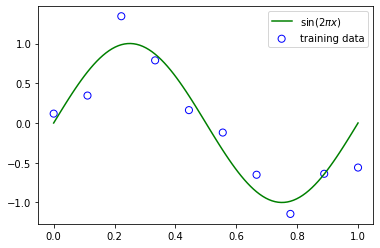

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [3]:
def pre_process(x,num):
  x_new = np.ones((x.shape[0], 1)).reshape(-1,1)
  x = x.reshape(-1,1)
  for i in range(1,num+1):
    x_new = np.hstack((x_new, x**i))
  return x_new

def mse(actual, predict):
  return np.sum(np.square(actual - predict))/len(actual)

1. sample thêm 10 điểm dữ liệu cho tập valdiation
2. fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.
3. thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.
4. chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting

# 1. Sample thêm 10 điểm dữ liệu cho tập validation

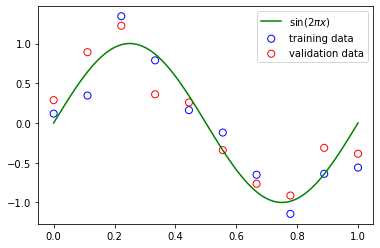

In [4]:
x_val, y_val = create_toy_data(func, 10, 0.25)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

#Train với hàm đa thức bậc 1

In [5]:
X_train_1 = np.column_stack((np.ones((x_val.shape[0],1)),x_train))
X_train_1

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [6]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_1),X_train_1)), np.dot(np.transpose(X_train_1),y_train))
w

array([ 0.78301942, -1.63788059])

In [7]:
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 1)
predict = np.dot(X_dummy,w)

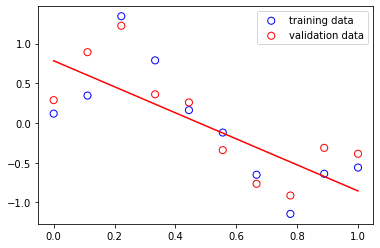

In [8]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [9]:
pred_1 = np.dot(X_train_1,w)
loss_1 = mse(y_train,pred_1)
pred_val_1 = np.dot(pre_process(x_val,1),w)
loss_val_1 = mse(y_val,pred_val_1)
print('Loss in training set: {}'.format(loss_1))
print('Loss in validation set: {}'.format(loss_val_1))

Loss in training set: 0.23077661663788357
Loss in validation set: 0.18132877322593322


$\rightarrow$ Model is underfitting

#Train với hàm đa thức bậc 3

In [10]:
X_train_3 = pre_process(x_train, 3)
X_train_3

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568, 0.00137174],
       [1.        , 0.22222222, 0.04938272, 0.01097394],
       [1.        , 0.33333333, 0.11111111, 0.03703704],
       [1.        , 0.44444444, 0.19753086, 0.0877915 ],
       [1.        , 0.55555556, 0.30864198, 0.17146776],
       [1.        , 0.66666667, 0.44444444, 0.2962963 ],
       [1.        , 0.77777778, 0.60493827, 0.47050754],
       [1.        , 0.88888889, 0.79012346, 0.70233196],
       [1.        , 1.        , 1.        , 1.        ]])

In [11]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_3),X_train_3)), np.dot(np.transpose(X_train_3),y_train))
w

array([ 1.13336032e-02,  9.29216157e+00, -2.67894422e+01,  1.70372865e+01])

In [12]:
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 3)
predict = np.dot(X_dummy,w)

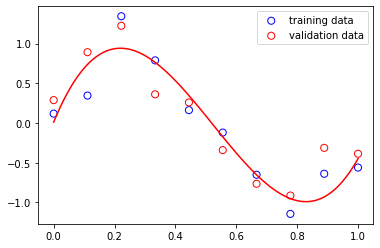

In [13]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [14]:
pred_3 = np.dot(X_train_3,w)
loss_3 = mse(y_train,pred_3)
pred_val_3 = np.dot(pre_process(x_val,3),w)
loss_val_3 = mse(y_val,pred_val_3)
print('Loss in training set: {}'.format(loss_3))
print('Loss in validation set: {}'.format(loss_val_3))

Loss in training set: 0.04982387306784293
Loss in validation set: 0.07772268092527769


$\rightarrow$ Model seems suitable

#Train với hàm đa thức bậc 9

In [15]:
X_train_9 = pre_process(x_train, 9)
X_train_9

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05, 1.88167642e-06, 2.09075158e-07,
        2.32305731e-08, 2.58117479e-09],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04, 1.20427291e-04, 2.67616202e-05,
        5.94702672e-06, 1.32156149e-06],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03, 1.37174211e-03, 4.57247371e-04,
        1.52415790e-04, 5.08052634e-05],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02, 7.70734663e-03, 3.42548739e-03,
        1.52243884e-03, 6.76639485e-04],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
   

In [16]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)), np.dot(np.transpose(X_train_9),y_train))
w

array([ 1.18058317e-01, -3.22288203e+01,  5.52497343e+02, -2.72786821e+03,
        4.75952496e+03,  2.04005786e+03, -1.93737483e+04,  2.83961338e+04,
       -1.78633573e+04,  4.24830988e+03])

In [17]:
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 9)
predict = np.dot(X_dummy,w)

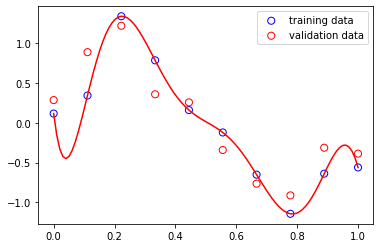

In [18]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [19]:
pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train,pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 7.217774558713649e-09
Loss in validation set: 0.07847179474906749


$\rightarrow$ Model is overfitting

#Dùng Ridge Regression để giảm overfitting

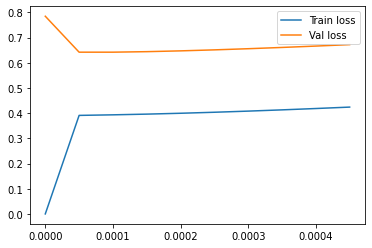

In [20]:
train_loss = {}
val_loss = {}

for i in np.arange(0, 0.0005, 0.00005):
  w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9) + np.identity(X_train_9.shape[0])*i), np.dot(np.transpose(X_train_9),y_train))
  pred_9 = np.dot(X_train_9,w)
  train_loss[i] = np.sum((y_train-pred_9)**2)
  pred_val_9 = np.dot(pre_process(x_val,9),w)
  val_loss[i] = np.sum((y_val-pred_val_9)**2)

plt.plot(list(train_loss.keys()), list(train_loss.values()), label = 'Train loss')
plt.plot(list(val_loss.keys()), list(val_loss.values()), label = 'Val loss')
plt.legend()

In [21]:
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9) + np.identity(X_train_9.shape[0]) \
                         * list(val_loss.keys())[np.argmin(list(val_loss.values()))]) \
                          , np.dot(np.transpose(X_train_9),y_train))

In [22]:
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 9)
predict = np.dot(X_dummy,w)

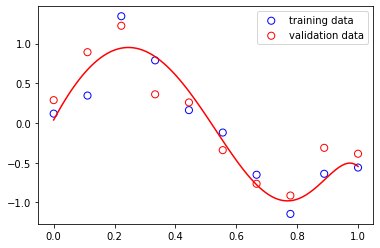

In [23]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [24]:
pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train,pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 0.03911084422042319
Loss in validation set: 0.06420572878950263


#Thêm 100 dữ liệu vào tập train và fit với model bậc 9

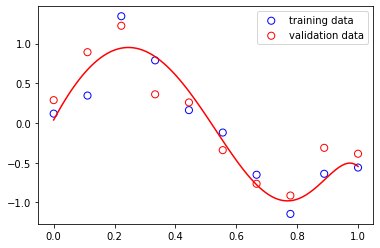

In [25]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

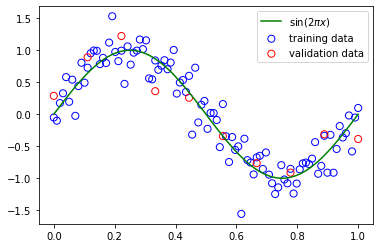

In [26]:
x_train, y_train = create_toy_data(func, 100, 0.25)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [27]:
X_train_9 = pre_process(x_train, 9)
w = np.dot(np.linalg.inv(np.dot(np.transpose(X_train_9),X_train_9)), np.dot(np.transpose(X_train_9),y_train))
x_dummy = np.linspace(0, 1, 100)
X_dummy = pre_process(x_dummy, 9)
predict = np.dot(X_dummy,w)

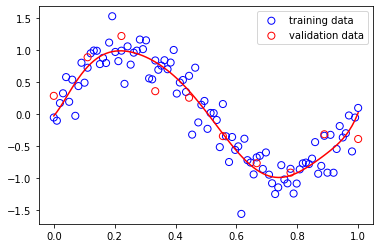

In [28]:
plt.plot(x_dummy, predict, 'r')
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="validation data")
plt.legend()
plt.show()

In [29]:
pred_9 = np.dot(X_train_9,w)
loss_9 = mse(y_train,pred_9)
pred_val_9 = np.dot(pre_process(x_val,9),w)
loss_val_9 = mse(y_val,pred_val_9)
print('Loss in training set: {}'.format(loss_9))
print('Loss in validation set: {}'.format(loss_val_9))

Loss in training set: 0.055304279868669065
Loss in validation set: 0.06824000783328542


$\rightarrow$ Model is no longer overfitting